<a href="https://colab.research.google.com/github/iMrugesh9/Cardiovascular_Risk_Prediction_Mrugesh_Patel/blob/main/Cardiovascular_Risk_Prediction_Mrugesh_Patel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Description

The dataset is from an ongoing cardiovascular study on residents of the town of Framingham,
Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of
future coronary heart disease (CHD). The dataset provides the patients’ information. It includes
over 4,000 records and 15 attributes.






As the prediction made is whether a person is diagnosed with CardioVascular heart disease, it is very vital to predict the outcome accurately. Especially predicting the class '*YES(1)*' accurately with as less false negatives as possible (predicting NO for actual YES) is very necessary.


Recall Score is one important metric to identify the effect of false negatives while predicting. F1 score is also important metric, because it considers both precision and recall.



\begin{align}
\mathbf{Recall}=\frac{True Positive}{True Positive+False Negative}
\\\\\\
\end{align}


\begin{align}
f1=\frac{2*True Positive}{True Positive+0.5(False Negative+False Negative)}
\end{align}

So the problem statement for the project is that to get the recall score and f1 score as high as possible for test dataset, ideally 1.0. So we need to formulate a model with atleast 0.95 recall score and f1 score.

In [1]:
# importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
import missingno as msno
warnings.filterwarnings('ignore')
from google.colab import data_table
from scipy import stats
from numpy import math
from scipy.stats import zscore
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from scipy.stats import pointbiserialr
from scipy.stats import chi2_contingency


from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score,f1_score
from sklearn.metrics import recall_score,classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import GridSearchCV

from imblearn.over_sampling import SMOTE 
from imblearn.under_sampling import RandomUnderSampler 
from imblearn.pipeline import Pipeline,make_pipeline

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve
from sklearn.inspection import permutation_importance


# Data Exploration

In [2]:
# mounting google drive
from google.colab import drive
drive.mount('/content/drive')      

Mounted at /content/drive


In [3]:
# loading data
Dataset=pd.read_csv('/content/drive/MyDrive/Datasets/data_cardiovascular_risk.csv')

In [4]:
# dataset head
Dataset.head(10)

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
5,5,61,3.0,F,NO,0.0,0.0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0,1
6,6,61,1.0,M,NO,0.0,0.0,0,1,0,238.0,232.0,136.0,24.83,75.0,79.0,0
7,7,36,4.0,M,YES,35.0,0.0,0,0,0,295.0,102.0,68.0,28.15,60.0,63.0,0
8,8,41,2.0,F,YES,20.0,NaN,0,0,0,220.0,126.0,78.0,20.70,86.0,79.0,0
9,9,55,2.0,F,NO,0.0,0.0,0,1,0,326.0,144.0,81.0,25.71,85.0,NaN,0


In [5]:
# dataset head
Dataset.tail(10)

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3380,3380,56,1.0,F,YES,20.0,0.0,0,0,0,240.0,125.0,79.0,27.38,80.0,82.0,0
3381,3381,63,1.0,F,NO,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
3382,3382,43,4.0,M,NO,0.0,0.0,0,1,0,260.0,129.0,90.0,25.29,70.0,62.0,0
3383,3383,57,3.0,F,NO,0.0,0.0,0,0,0,210.0,131.0,85.0,26.59,70.0,77.0,0
3384,3384,61,1.0,F,NO,0.0,0.0,0,1,0,217.0,182.0,86.0,26.98,105.0,113.0,0
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


## Data Description
### **Variables :**

Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk
factors.
### **Demographic**:

• **Sex**: male or female("M" or "F")

• **Age**: Age of the patient;(Continuous - Although the recorded ages have been truncated to
whole numbers, the concept of age is continuous)

### **Behavioral**

• **is_smoking**: whether or not the patient is a current smoker ("YES" or "NO")

• **Cigs Per Day**: the number of cigarettes that the person smoked on average in one day.(can be
considered continuous as one can have any number of cigarettes, even half a cigarette.)
### **Medical( history)**

• **BP Meds**: whether or not the patient was on blood pressure medication (Nominal)

• **Prevalent Stroke**: whether or not the patient had previously had a stroke (Nominal)

• **Prevalent Hyp**: whether or not the patient was hypertensive (Nominal)

• **Diabetes**: whether or not the patient had diabetes (Nominal)

### **Medical(current)**

• **Tot Chol**: total cholesterol level (Continuous)

• **Sys BP**: systolic blood pressure (Continuous)

• **Dia BP**: diastolic blood pressure (Continuous)

• **BMI**: Body Mass Index (Continuous)

• **Heart Rate**: heart rate (Continuous - In medical research, variables such as heart rate though in
fact discrete, yet are considered continuous because of large number of possible values.)

• **Glucose**: glucose level (Continuous)
Predict variable (desired target)

• **10-year risk of coronary heart disease CHD** (binary: “1”, means “Yes”, “0” means “No”) 

In [6]:
# dataset variables information
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

The Dataset has 3390 rows of entries and 14 features (variables) for each row entries of id and the target variable TenYearCHD. Out of 14 variables, education cigsPerDay, BPmeds, totChol,BMI, heartrate, gluscose columns have some Null values. Since the dataset size is not huge, the null value treatment is very important. 

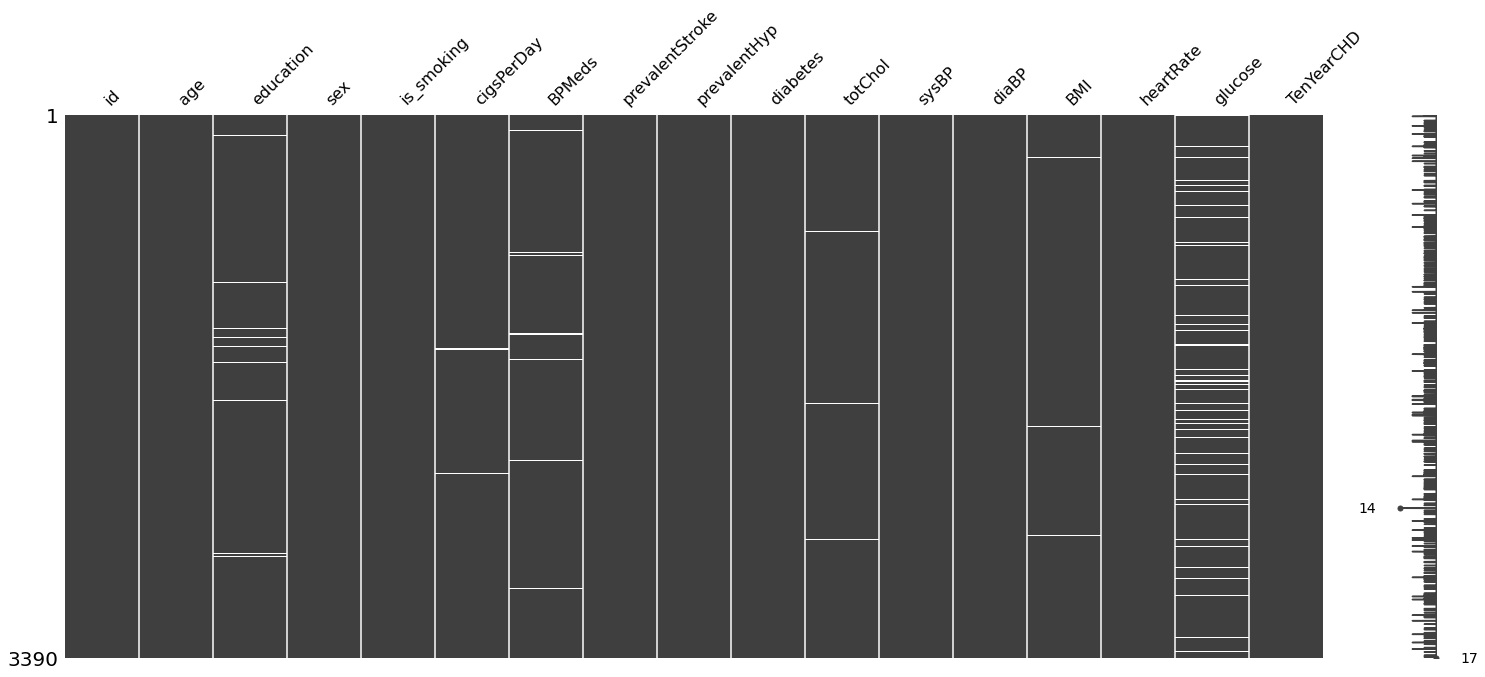

In [7]:
#missing no plot
msno.matrix(Dataset)

In [8]:
# Target Variable
Dataset.TenYearCHD.value_counts()

0    2879
1     511
Name: TenYearCHD, dtype: int64

As there is imbalance in traget variable, resampling must be done on train dataset (SMOTE) to ensure the model outcome is not misleading. Here the target variable 1 means, TenYearCHD values is YES, i.e. CHD will occur. So it is very important to predict the value 1 most accurately as well as predict false negative (predict 0 for actual 1) as less as possible.

So The metric recall or f1 score for value '1' is the important metric, and will be chosen as the metric for the study.

In [9]:
#Dataset summary 
Dataset.describe(include='all')

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3390,3390,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
unique,NaN,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,F,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,1923,1703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1694.500000,49.542183,1.970936,NaN,NaN,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,NaN,NaN,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,NaN,NaN,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000


It is obvious from above data summary, the BPmeds, prevalentStroke, prevalentHyp, diabetes are Binary variables, which can be considerede as a categorical variables and Sex and is_smoking are categorical variabels.

In [10]:
Dataset.education.value_counts()

1.0    1391
2.0     990
3.0     549
4.0     373
Name: education, dtype: int64

As we cam see, Education feature with only four unique values; So It is considered a also categorical feature.